# EDA and Sentiment Analysis on COVID19 Tweets

My attempt to perform EDA and sentiment analysis on covid19 tweets. 

This dataset contains covid19 tweet but since there is no column indicating tweet's sentiment, I have on-boarded another Kaggle dataset, namely [Covid 19 Indian Sentiments on covid19 and lockdown](https://www.kaggle.com/surajkum1198/twitterdata), which contains cleaned tweets from india on topics like coronavirus ,covid 19 and lockdown etc. The tweets have been collected betwen dates 23th march 2020 and 15th july 2020. I would also like to aknowledege Gabriel Preda's notebook on [covid-19 tweets](https://www.kaggle.com/gpreda/coronavirus-covid-19-tweets). 

This notebook is organized as follows:

1. EDA on Covid19 tweets<br> 
    * Plot missing values.
    * Plot unique values.
    * Plot frequency of users tweeting about Corona
    * Plot frequency of locations tweeting about Corona
    * Plot frequency of sources tweeting about Corona
    * Visualizing location-wise top 50 prevelant words
2. Sentiment Analysis on Covid19 Tweets<br>
    * Exploring tweet data
    * Encoding tweets
    * Encoding sentiments
    * Detecting outlier reviews
    * Training, testing and validating
    * Dataloaders and batching
    * Sentiment network with PyTorch
    * Instantiate the netork
    * Calculating model's accuracy
    * Testing model on a random covid19 tweet.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitterdata/finalSentimentdata2.csv
/kaggle/input/covid19-tweets/covid19_tweets.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/covid19-tweets/covid19_tweets.csv')

# EDA on Covid19 Tweets

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
df.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


In [5]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [6]:
print('Shape of tweets dataframe : {}'.format(df.shape))

Shape of tweets dataframe : (179108, 13)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB



## Plot Missing Values

In [8]:


import seaborn as sns
import matplotlib.pyplot as plt

def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()
     

In [9]:


return_missing_values(df)

source              0.000430
user_description    0.057429
user_location       0.205301
hashtags            0.286609
dtype: float64

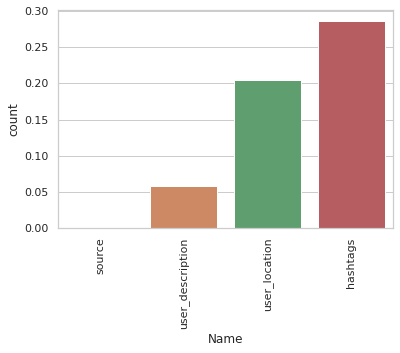

In [10]:
plot_missing_values(df)

### Acceptable color pallets in seaborn (i.e. we can experiment with `cmap` value below) : <br>

```python
Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
```


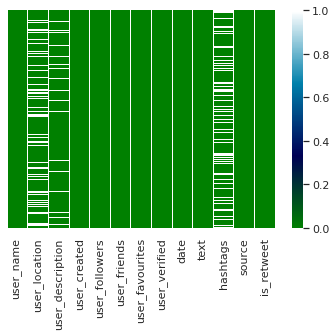

In [11]:
# heatmap representation of missing values

# plasma,visdir

sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='ocean')

## Plot Unique Values 

In [12]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [13]:
udf = return_unique_values(df)
print(udf)

            Features  Uniques
0          user_name    92276
1      user_location    26920
2   user_description    89200
3       user_created    93708
4     user_followers    27694
5       user_friends    11022
6    user_favourites    35259
7      user_verified        2
8               date   136611
9               text   178683
10          hashtags    52640
11            source      610
12        is_retweet        1


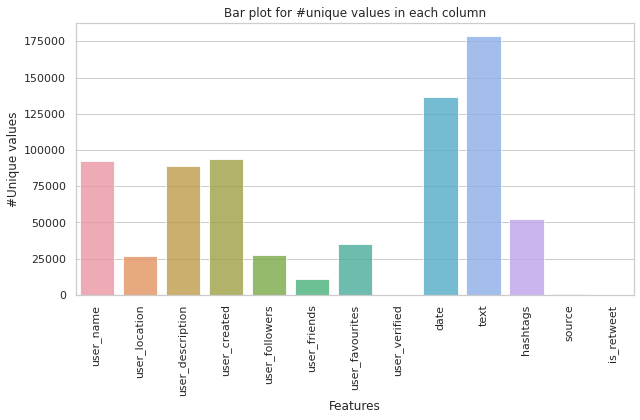

In [14]:
f, ax = plt.subplots(1,1, figsize=(10,5))#plt.figure(figsize=(10, 5))

sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for #unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Frequency of users tweeting about Corona

In [15]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    

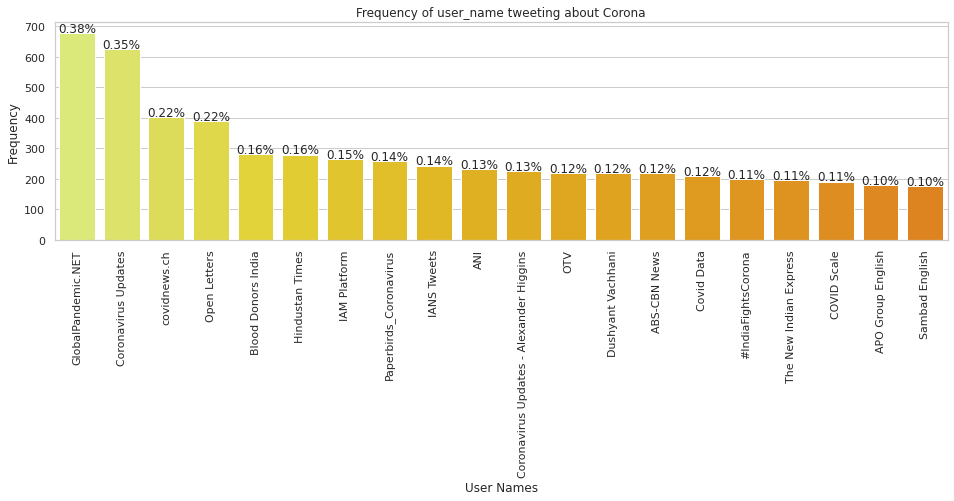

In [16]:
plot_frequency_charts(df, 'user_name', 'User Names','Wistia')

## Frequency of locations tweeting about Corona

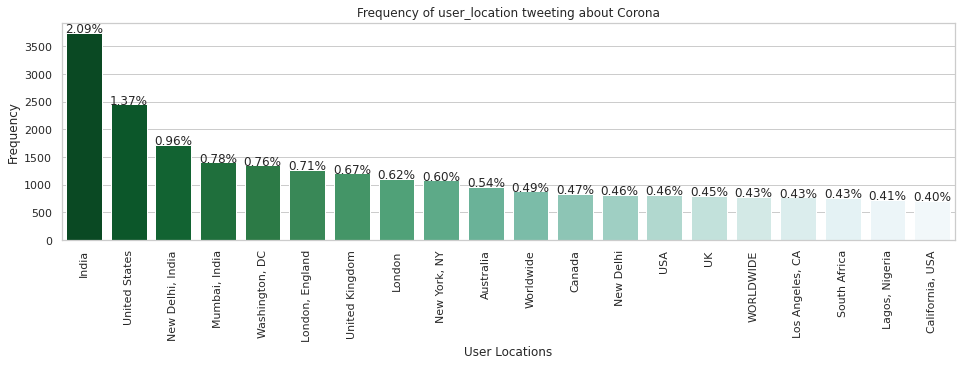

In [17]:
plot_frequency_charts(df, 'user_location', 'User Locations', 'BuGn_r')

## Frequency of sources tweeting about Corona

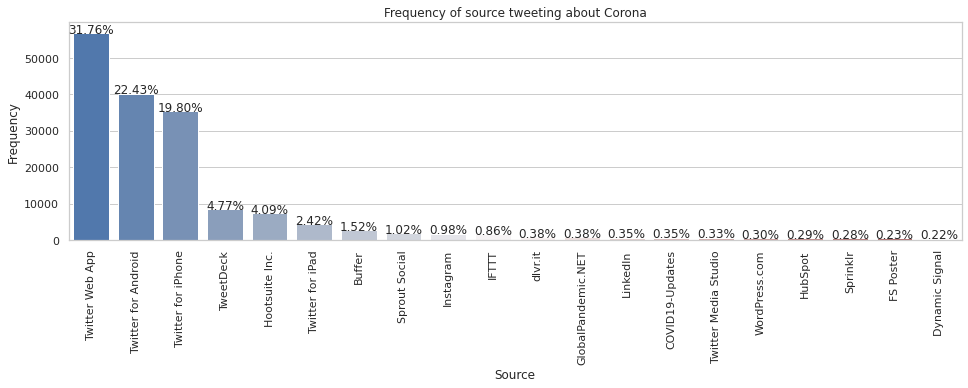

In [18]:
plot_frequency_charts(df, 'source','Source', 'vlag')

## Visualizing top 30 words location wise

In [19]:
from string import punctuation
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

["you've", "you'll", "you'd", 'your', 'yours']


In [20]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [21]:
from collections import Counter

def draw_bar_graph_for_text_visualization(df, location):
    tweets_from_loc = df.loc[df.user_location==location]
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['text'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'count'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='count', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Prevelant Words in {}".format(location))
    plt.xticks(rotation='vertical');
    

In [22]:
from wordcloud import WordCloud, STOPWORDS



def draw_word_cloud(df, location, title):
    loc_df = df.loc[df.user_location==location]
    loc_df.loc[:, 'text'] = loc_df['text'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()
    

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


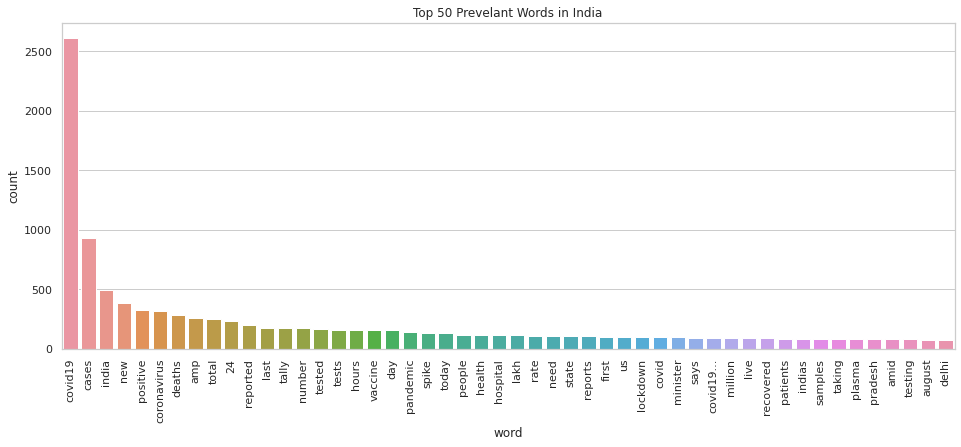

In [23]:
draw_bar_graph_for_text_visualization(df, 'India')

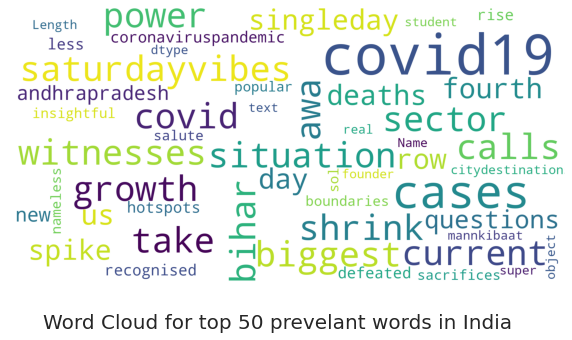

In [24]:
draw_word_cloud(df, 'India', 'Word Cloud for top 50 prevelant words in India')

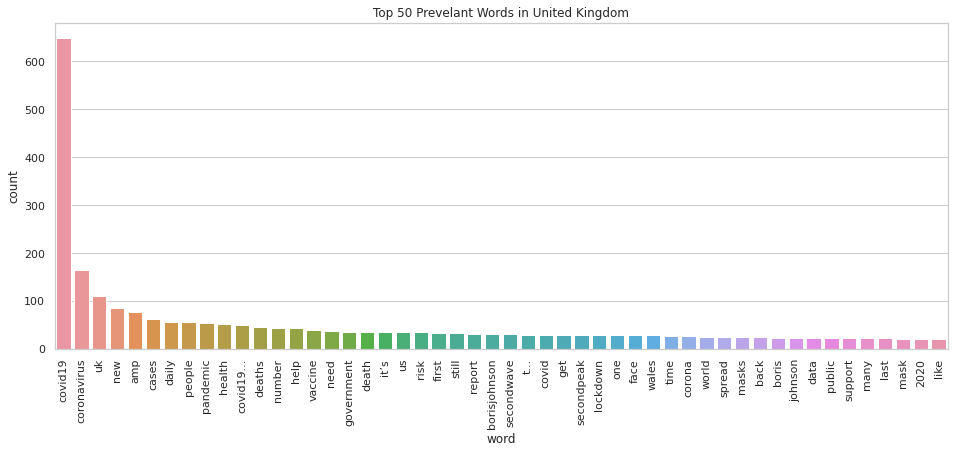

In [25]:
draw_bar_graph_for_text_visualization(df, 'United Kingdom')

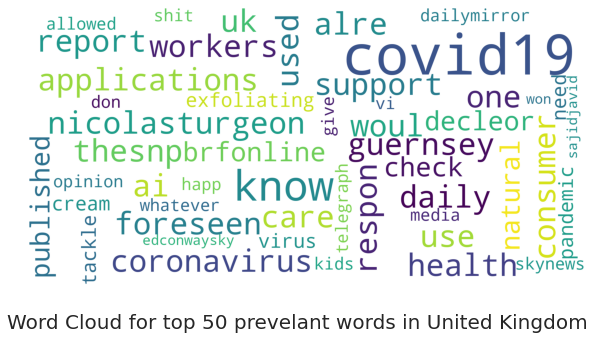

In [26]:
draw_word_cloud(df, 'United Kingdom', 'Word Cloud for top 50 prevelant words in United Kingdom')

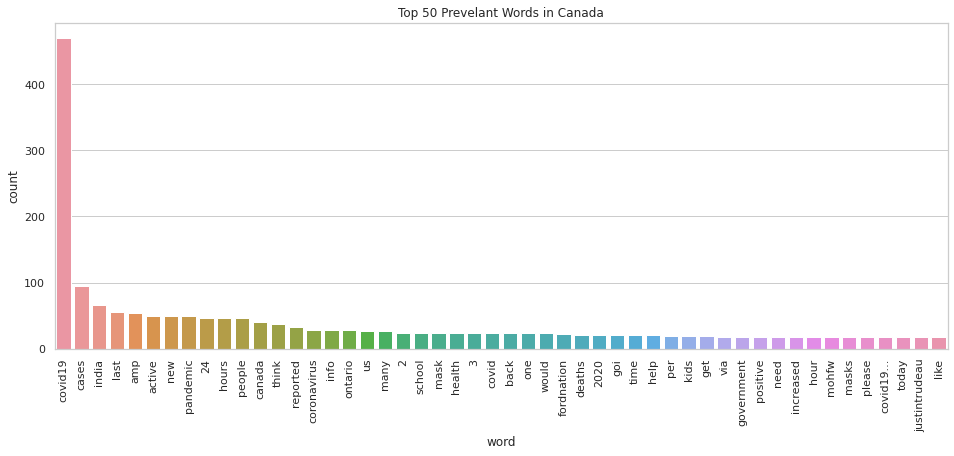

In [27]:
draw_bar_graph_for_text_visualization(df, 'Canada')

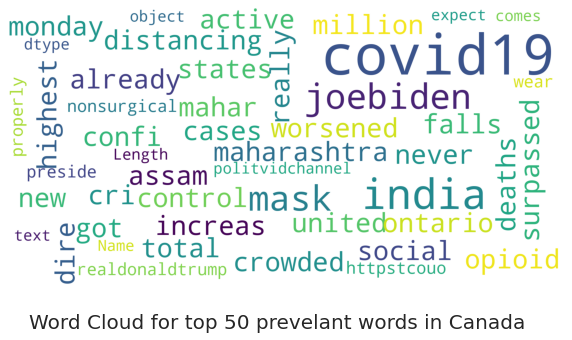

In [28]:
draw_word_cloud(df, 'Canada', 'Word Cloud for top 50 prevelant words in Canada')

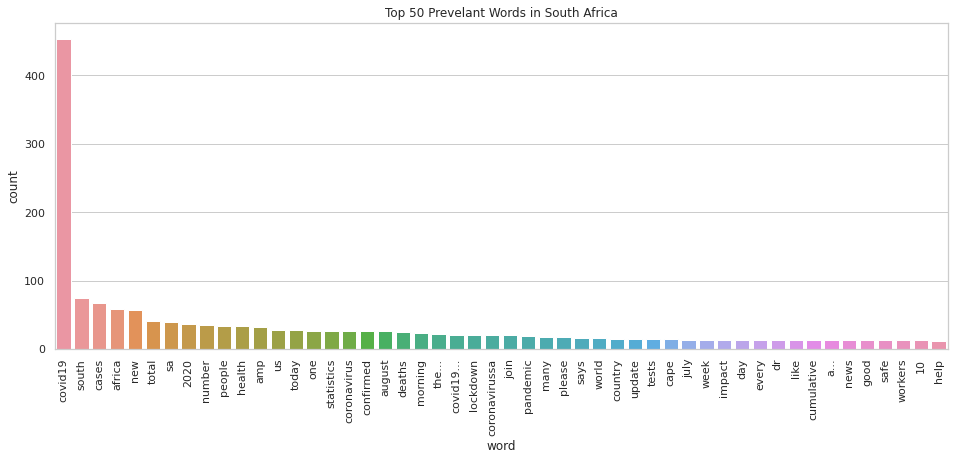

In [29]:
draw_bar_graph_for_text_visualization(df, 'South Africa')

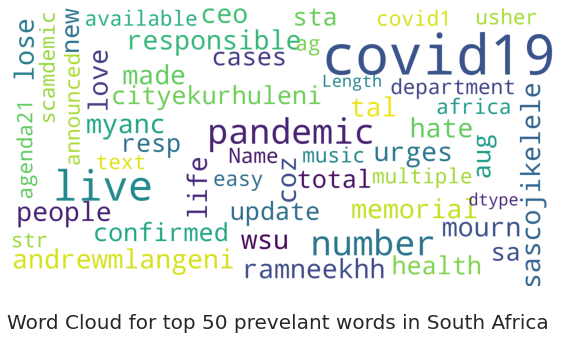

In [30]:
draw_word_cloud(df, 'South Africa', 'Word Cloud for top 50 prevelant words in South Africa')

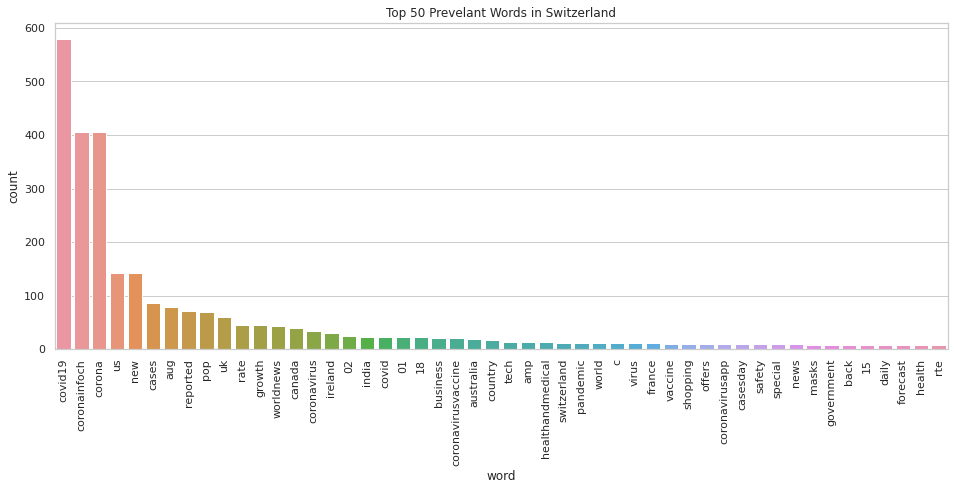

In [31]:
draw_bar_graph_for_text_visualization(df, 'Switzerland')

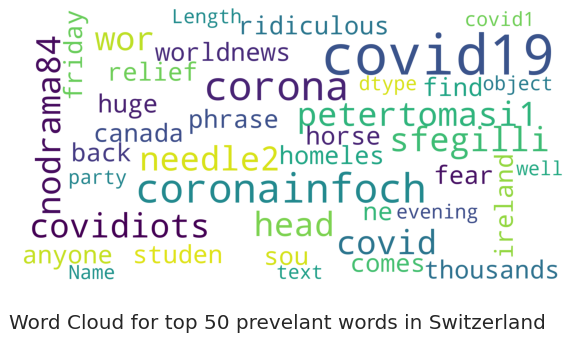

In [32]:
draw_word_cloud(df, 'Switzerland', 'Word Cloud for top 50 prevelant words in Switzerland')

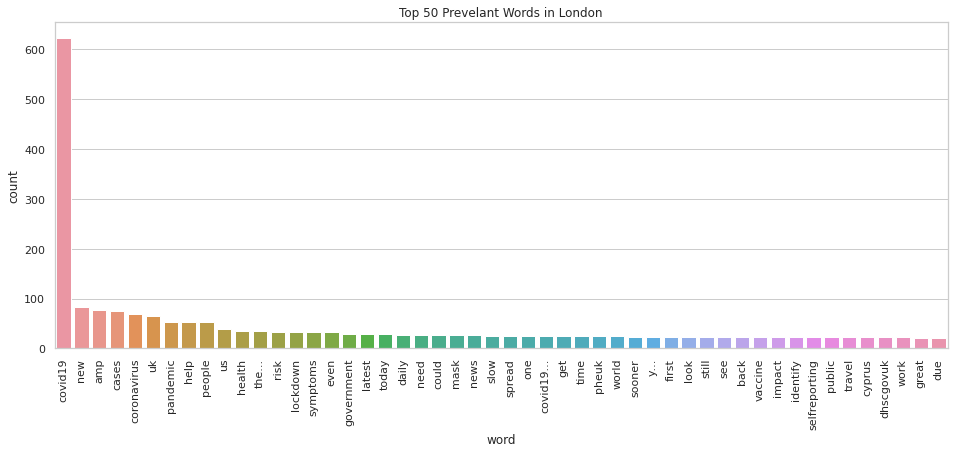

In [33]:
draw_bar_graph_for_text_visualization(df, 'London')

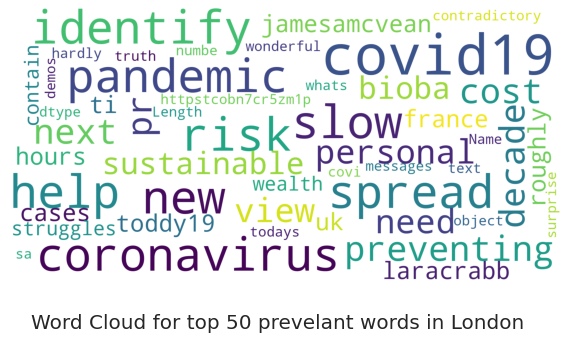

In [34]:
draw_word_cloud(df, 'London', 'Word Cloud for top 50 prevelant words in London')

# Sentiment Analysis on Covid19 Tweets

For this part of the notebook I will be using [Covid 19 Indian Sentiments on covid19 and lockdown](https://www.kaggle.com/surajkum1198/twitterdata) dataset.

## Exploring Tweet Data

* Sentiment Analysis on Covid19 Tweets
    * Exploring tweet data
    * Encoding tweets
    * Encoding sentiments
    * Detecting outlier reviews
    * Training, testing and validating
    * Dataloaders and batching
    * Sentiment network with PyTorch
    * Instantiate the netork
    * Calculating model's accuracy
    * Testing model on a random covid19 tweet.

In [35]:
sentiment_df = pd.read_csv('/kaggle/input/twitterdata/finalSentimentdata2.csv')

In [36]:
sentiment_df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [37]:
sentiment_df.columns

Index(['Unnamed: 0', 'sentiment', 'text'], dtype='object')

In [38]:
sentiment_df['sentiment'].nunique

<bound method IndexOpsMixin.nunique of 0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object>

In [39]:
sentiment_df.loc[:, 'text'] = sentiment_df['text'].apply(punctuation_stopwords_removal)

In [40]:
reviews_split = []
for i, j in sentiment_df.iterrows():
    reviews_split.append(j['text'])


In [41]:
words = []
for review in reviews_split:
    for word in review:
        words.append(word)


In [42]:
print(words[:20])

['agree', 'poor', 'india', 'treated', 'badly', 'poors', 'seek', 'living', 'singapore', 'treated', 'like', 'citizens', 'given', 'free', 'medical', 'treatment', 'given', 'food', 'daily', 'sim']


## Encoding Tweets
Create an array that contains integer encoded version of words in reviews. The word appearing the most should have least integer value. Example if the appeared the most in reviews, then assign 'the' : 1

In [43]:
from collections import Counter

counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word:ii for ii, word in enumerate(vocab, 1)}

In [44]:
encoded_reviews = []
for review in reviews_split:
    encoded_reviews.append([vocab_to_int[word] for word in review])


In [45]:
print(len(vocab_to_int))
print(encoded_reviews[:10])

10662
[[853, 186, 20, 1079, 1457, 4429, 2201, 407, 1240, 1079, 15, 218, 337, 167, 253, 462, 337, 122, 168, 4430, 4431, 140, 23, 264, 58, 765, 3, 5, 195, 1079, 2966, 274], [80, 1755, 4432, 2967, 4433, 86, 854, 1080, 2968, 4434, 4435, 7], [543, 4436, 946, 1458, 265, 2, 1241, 168, 2202], [1, 4437, 169, 266, 1459, 129, 1242, 47, 7], [304, 1756, 4438, 168, 8, 39, 219, 93, 355, 4, 21], [2203, 2204, 1, 1757, 1243, 2969, 1460, 1081, 1461, 4439, 98, 4440], [947, 37, 1758, 285, 948, 4441, 1462, 2205, 13, 3, 5, 4442, 285, 1244, 4443, 1463, 4444, 4445, 286, 4446, 15, 4447, 47, 228, 2970, 338, 40, 312, 1463, 179, 1759], [41, 377, 149, 1245, 4448, 34], [2206, 649, 180, 1760, 2207, 91, 650, 378, 463, 1246, 595, 1464, 2208, 2, 8, 2209, 651, 40, 379, 2210, 21, 228, 703, 1246, 1761, 408], [2206, 649, 180, 1760, 2207, 91, 650, 378, 463, 1246, 595, 1464, 2208, 2, 8, 2209, 651, 40, 379, 2210, 21, 228, 703, 1246, 2971]]


## Encoding Sentiments

For simplicity purposes, I am encoding positive sentiment such as joy as 1 and rest (anger, sad) as 0

In [46]:
labels_to_int = []
for i, j in sentiment_df.iterrows():
    if j['sentiment']=='joy':
        labels_to_int.append(1)
    else:
        labels_to_int.append(0)
    

## Detecting any outlier reviews

This step involves -<br>
1. Getting rid of extremely long/short reviews
2. Padding/truncating reaining data to maintain constant review length.

In [47]:
reviews_len = Counter([len(x) for x in encoded_reviews])
print(max(reviews_len))

48


In [48]:
print(len(encoded_reviews))

3090


In [49]:
non_zero_idx = [ii for ii, review in enumerate(encoded_reviews) if len(encoded_reviews)!=0]
encoded_reviews = [encoded_reviews[ii] for ii in non_zero_idx]
encoded_labels = np.array([labels_to_int[ii] for ii in non_zero_idx])

In [50]:
print(len(encoded_reviews))
print(len(encoded_labels))

3090
3090


In [51]:
def pad_features(reviews_int, seq_length):
    features = np.zeros((len(reviews_int), seq_length), dtype=int)
    for i, row in enumerate(reviews_int):
        if len(row)!=0:
            features[i, -len(row):] = np.array(row)[:seq_length]
    return features

In [52]:
seq_length = 50
padded_features= pad_features(encoded_reviews, seq_length)
print(padded_features[:2])


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  853  186   20 1079 1457 4429 2201  407 1240 1079
    15  218  337  167  253  462  337  122  168 4430 4431  140   23  264
    58  765    3    5  195 1079 2966  274]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   80 1755 4432 2967
  4433   86  854 1080 2968 4434 4435    7]]


## Training, Testing and Validating

In [53]:
split_frac = 0.8
split_idx = int(len(padded_features)*split_frac)

training_x, remaining_x = padded_features[:split_idx], padded_features[split_idx:]
training_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]


## Dataloaders and Batching

A neat way to create data-loaders and batch our training, validation and test Tensor datasets is as follows -<br>
```python
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
train_loader = DataLoader(train_data, batch_size=batch_size)
```
This is an alternative to creating a generator function for batching our data into full batches.

In [ ]:
# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# %pip install torch torchvision torchaudio
%pip install torch -f https://download.pytorch.org/whl/torch_stable.html

# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

In [54]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [55]:
# torch.from_numpy creates a tensor data from n-d array
train_data = TensorDataset(torch.from_numpy(training_x), torch.from_numpy(training_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))

batch_size = 1

train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)
valid_loader = DataLoader(valid_data, batch_size=batch_size)

In [56]:
gpu_available = torch.cuda.is_available

gpu_available = False

if gpu_available:
    print('Training on GPU')
else:
    print('GPU not available')

Training on GPU


## Sentiment Network with PyTorch
Below are the various layers of our RNN that would perform sentiment analysis -<br>
1. An *embedding layer* that converts our word tokens (integers) into embeddings of a specific size.
2. A *LSTM layer* defined by a hidden_state size and number of layers
3. A fully-connected output layer that maps the LSTM layer outputs to a desired output_size
4. A sigmoid activation layer which turns all outputs into a value 0-1; return only the last sigmoid output as the output of this network."

In [57]:
import torch.nn as nn

class CovidTweetSentimentAnalysis(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.2):
        super(CovidTweetSentimentAnalysis, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding_layer = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
    
    def forward(self, x, hidden):
        # x : batch_size * seq_length * features
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding_layer(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        out = self.dropout(lstm_out)
        out = self.fc(out)
        sig_out = self.sig(out)
        
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        # initialize weights for lstm layer
        weights = next(self.parameters()).data
        
        if gpu_available:
            hidden = (weights.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                     weights.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weights.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                     weights.new(self.n_layers, batch_size, self.hidden_dim).zero())
        return hidden

## Instantiate the network
Here, I will define the model hyper-parameters -<br>

1. `vocab_size` : Size of our vocabulary or the range of values for our input, word tokens.
2. `output_size` : Size of our desired output; the number of class scores we want to output (pos/neg).
3. `embedding_dim` : Number of columns in the embedding lookup table; size of our embeddings.
4. `hidden_dim` : Number of units in the hidden layers of our LSTM cells. Usually larger is better performance wise. Common values are 128, 256, 512, etc.
5. `n_layers`: Number of LSTM layers in the network. Typically between 1-3

In [58]:
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1 # either happy or sad
embedding_dim = 400
hidden_dim = 256
n_layers = 2

In [59]:
net = CovidTweetSentimentAnalysis(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

CovidTweetSentimentAnalysis(
  (embedding_layer): Embedding(10663, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [60]:
lr = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [61]:
epochs = 4
count = 0
print_every = 100
clip = 5 
if gpu_available:
    net.cuda()

net.train()
for e in range(epochs):
    # initialize lstm's hidden layer 
    h = net.init_hidden(batch_size)
    for inputs, labels in train_loader:
        count += 1
        if gpu_available:
            inputs, labels = inputs.cuda(), labels.cuda()
        h = tuple([each.data for each in h])
        
        # training process
        net.zero_grad()
        outputs, h = net(inputs, h)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm(net.parameters(), clip)
        optimizer.step()
        
        # print average training losses
        if count % print_every == 0:
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                val_h = tuple([each.data for each in val_h])
                if gpu_available:
                    inputs, labels = inputs.cuda(), labels.cuda()
            outputs, val_h = net(inputs, val_h)
            val_loss = criterion(outputs.squeeze(), labels.float())
            val_losses.append(val_loss.item())
        
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(count),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Epoch: 1/4... Step: 100... Loss: 0.109616... Val Loss: 0.139864
Epoch: 1/4... Step: 200... Loss: 0.074620... Val Loss: 0.145828
Epoch: 1/4... Step: 300... Loss: 0.141870... Val Loss: 0.134092
Epoch: 1/4... Step: 400... Loss: 0.116753... Val Loss: 0.095981
Epoch: 1/4... Step: 500... Loss: 2.592511... Val Loss: 0.130279
Epoch: 1/4... Step: 600... Loss: 0.117990... Val Loss: 0.124446
Epoch: 1/4... Step: 700... Loss: 0.652662... Val Loss: 0.776508
Epoch: 1/4... Step: 800... Loss: 0.677741... Val Loss: 0.820613
Epoch: 1/4... Step: 900... Loss: 0.777425... Val Loss: 0.619942
Epoch: 1/4... Step: 1000... Loss: 0.026646... Val Loss: 0.879203
Epoch: 1/4... Step: 1100... Loss: 0.223190... Val Loss: 0.557283
Epoch: 1/4... Step: 1200... Loss: 0.642497... Val Loss: 0.642554
Epoch: 1/4... Step: 1300... Loss: 0.021812... Val Loss: 0.543495
Epoch: 1/4... Step: 1400... Loss: 0.062095... Val Loss: 0.642128
Epoch: 1/4... Step: 1500... Loss: 3.415804... Val Loss: 0.892964
Epoch: 1/4... Step: 1600... Loss: 

## Calculating model's accuracy

The `CovidTweetSentimentAnalysis` model achieved accuracy of 85.4 %

In [62]:
test_losses = []
num_correct = 0

h = net.init_hidden(batch_size)
net.eval()

for inputs, labels in test_loader:
    h = tuple([each.data for each in h])
    if gpu_available:
        inputs, labels = inputs.cuda(), labels.cuda()
    
    outputs, h = net(inputs, h)
    test_loss = criterion(outputs.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    pred = torch.round(outputs.squeeze())
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not gpu_available else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

# printing average statistics
print("Test loss: {:.3f}".format(np.mean(test_losses)))
    
# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.563
Test accuracy: 0.877


## Testing model on random tweet

Since for performing sentiment analysis on covid 19 tweets, I on-boarded a completely different dataset in this notebook. Now that the our model is trained,we can use this model to perform sentiment analysis on tweets related to covid19 on this notebook.

In [63]:
from string import punctuation

def tokenize_covid_tweet(tweet):
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in tweet])
    return test_ints

In [64]:
def predict_covid_sentiment(net, test_tweet, seq_length=50):
    print('Original Sentence :')
    print(test_tweet)
    
    print('\nAfter removing punctuations and stop-words :')
    test_tweet = punctuation_stopwords_removal(test_tweet)
    print(test_tweet)
    
    print('\nAfter converting pre-processed tweet to tokens :')
    tokenized_tweet = tokenize_covid_tweet(test_tweet)
    print(tokenized_tweet)
    
    print('\nAfter padding the tokens into fixed sequence lengths :')
    padded_tweet = pad_features(tokenized_tweet, 50)
    print(padded_tweet)
    
    feature_tensor = torch.from_numpy(padded_tweet)
    batch_size = feature_tensor.size(0)
    
    if gpu_available:
        feature_tensor = feature_tensor.cuda()
    
    h = net.init_hidden(batch_size)
    output, h = net(feature_tensor, h)
    
    predicted_sentiment = torch.round(output.squeeze())
    print('\n==========Predicted Sentiment==========\n')
    if predicted_sentiment == 1:
        print('Happy')
    else:
        print('Sad')
    print('\n==========Predicted Sentiment==========\n')


In [65]:
test_sad_tweet = 'It is very sad to see the corona pandemic increasing at such an alarming rate'
predict_covid_sentiment(net, test_sad_tweet)

Original Sentence :
It is very sad to see the corona pandemic increasing at such an alarming rate

After removing punctuations and stop-words :
['sad', 'see', 'corona', 'pandemic', 'increasing', 'alarming', 'rate']

After converting pre-processed tweet to tokens :
[[328, 63, 2, 28, 1964, 6137, 267]]

After padding the tokens into fixed sequence lengths :
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  328   63    2   28 1964 6137  267]]

==========Predicted Sentiment==========

Sad

==========Predicted Sentiment==========



In [66]:
test_happy_tweet = 'It is amazing to see that New Zealand reaches 100 days without Covid transmission!'
predict_covid_sentiment(net, test_happy_tweet)

Original Sentence :
It is amazing to see that New Zealand reaches 100 days without Covid transmission!

After removing punctuations and stop-words :
['amazing', 'see', 'new', 'zealand', 'reaches', '100', 'days', 'without', 'covid', 'transmission']

After converting pre-processed tweet to tokens :
[[642, 63, 30, 9453, 8081, 225, 35, 125, 3, 1326]]

After padding the tokens into fixed sequence lengths :
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0  642   63
    30 9453 8081  225   35  125    3 1326]]

==========Predicted Sentiment==========

Happy

==========Predicted Sentiment==========

